# IA Paper 1 - Mechanical Vibrations - Examples paper 2

## Question 4  

The equivalent mass, stiffness and damping factor of a fan blade vibrating at low frequency is
determined experimentally by applying a sinusoidally varying force of amplitude 5.8N at a given point on the fan blade at various frequencies. The following values of steady-state oscillation at the driving point are obtained:  

$$ 
\begin{array}{c|c|c|c|c|c|c|c} 
\text{frequency (Hz)}  &0 & 14 & 16 & 18 & 20 & 22 & 24 & 26 \\ \hline
\text{response amplitude Y(mm)}  & 0.10 & 0.19 & 0.24 & 0.34 & 0.40 & 0.29 & 0.19 & 0.13 
\end{array} 
$$

Within this frequency range, the fan blade can be regarded as a system with one degree of freedom (as shown in Fig. 1) comprising a mass $m$ attached to a spring $k$ and a dashpot $\lambda$ . A sinusoidal force $f(t)$ is applied to the mass.  

By considering only the response at low frequency (the static response) , find the spring constant $k$. The maximum amplitude of response occurs when the frequency of excitation is 20Hz. Use the formula for $Y_{\max}$ given on page 8 of the Mechanics Data Book to estimate the damping factor $\zeta$. (Hint: first assumethat $\zeta \ll 1$ and then check this assumption.) 

Estimate the damped resonant frequency $\omega_r$ and calculate the undamped natural frequency $\omega_n$. Hence find the equivalent mass $m$ and the equivalent dashpot rate $\lambda$ for the fan blade.  

**Write a short Python program to plot the points from the table above on the same axes as the Data Book formula using your estimated parameter values, and compare.**

### Solution

In [1]:
%matplotlib inline

First we import all relevant modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We set the system parameters here (using the values calculated earlier).

Note: often it can be better to leave numbers in units which bring them closest to single integer numbers as this can help with round off errors. However, we're going to convert everything into SI units.

In [3]:
# System parameters

# Force
force = 5.8

# Damped angular resonance frequency (20Hz)
omega_r = 126.5

# Spring contant (from your solution)
k = 58e3

# Dashpot constant (from your solution)
lamb = 114.0

# Undamped/ natural angular resonance frequency (from your solution)
omega_n = 128.0

# Mass (from your solution)
m = 3.6

# Damping factor (from your solution)
zeta = lamb/(2*np.sqrt(k*m))

# Displacement at 0Hz (from your solution)
Y0 = force/k

We then create arrays for the experimental data.  

In [4]:
f_exp = np.array([0, 14, 16, 18, 20, 22, 24, 26])
y_exp = 1e-3*np.array([0.1, 0.19, 0.24, 0.34, 0.40, 0.29, 0.19, 0.13])

Next we create the theoretical curve by creating an evenly spaced array for frequencies and calculating the corresponding amplitudes for them. (We will also calculate the angular frequencies from the frequencies: $\omega = 2 \pi f$ ).

In [5]:
# Creates an array for the freqencies for theoretical curve
# (note: need 61 entries not 60 for 0.5 spacing)
f = np.linspace(0, 30, 61)

# Creates an array for the angular frequencies
omega = 2*np.pi*f

From the data book, we have the formula:
$$Y=\frac{Y_0}{\Big\{\big[1-( \omega/\omega_n)^2 \big]^2 + (2 \zeta \omega / \omega_n )^2 \Big\}^{1/2}}$$

From this, we calculate the first bracket in the demoninator, `t1` , and the second, `t2`, for simplicity and then use these to calculate $Y$ for each of the frequencies in `omega`.

In [6]:
t1 = (1 - (omega/omega_n)**2)**2
t2 = (2*zeta*omega/omega_n)**2

# Response of system
Y = Y0/np.sqrt(t1 + t2)

We then plot the experimental data and the theoretical curve on the same plot.

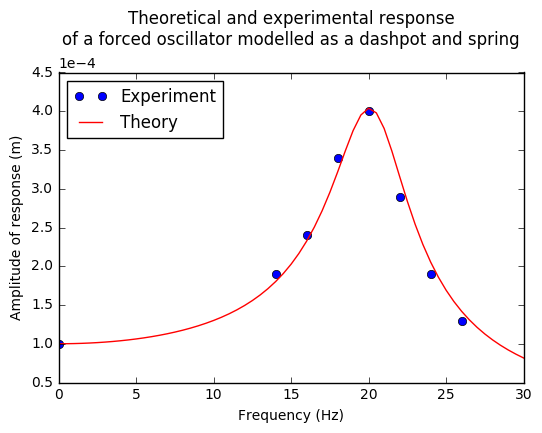

In [7]:
# Plot the experimental data as points
plt.plot(f_exp, y_exp, 'bo')
plt.hold("on")

# Plot the theoretical curve
plt.plot(f, Y, 'r-')
plt.hold("off")

# Adds sensible legend
plt.legend(['Experiment', 'Theory'], loc='upper left')

# Adds title
plt.title("""Theoretical and experimental response
of a forced oscillator modelled as a dashpot and spring
""")

# Adds x and y labels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude of response (m)")

# Puts the y axis in scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2));

## Question 10

Consider a mass-spring-dashpot oscillator, with a natural frequency 100 Hz and a damping factor $\zeta = 0.03$. Write a Python program to draw a graph of the impulse response, from P7 of the Mechanics Data Book, as a function time over the period 0.4 s, with a time step 0.0003 s. With the same time axis, make a vector of values of a sinusoidal signal at a chosen frequency $f$, then use the NumPy function `convolve` to calculate the response of the oscillator to this input signal by convolution. Explore the cases $f = 80, 100, 110, 150$ Hz. In each case identify the transient and the steady harmonic response.

### Solution 

In [8]:
%matplotlib inline

We import all relevant modules

In [9]:
import numpy as np
import matplotlib.pyplot as plt

We first compute the response of the system using the expression the data book.

In [10]:
# Damping coefficient
zeta = 0.03

# Natural frequency and damped natural frequency (in rad/s)
wn = 100.0*2.0*np.pi
wd = wn*np.sqrt(1.0 - zeta*zeta)

# Create time steps from 0.0 to 0.4, with increments of dt=0.0003
dt = 0.0003
t = np.arange(0.0, 0.4, dt)

# Compute impulse response
y = np.exp(-zeta*wn*t)*np.sin(wd*t)/(np.sqrt(1.0 - zeta*zeta))

We now plot the response as a function of time,

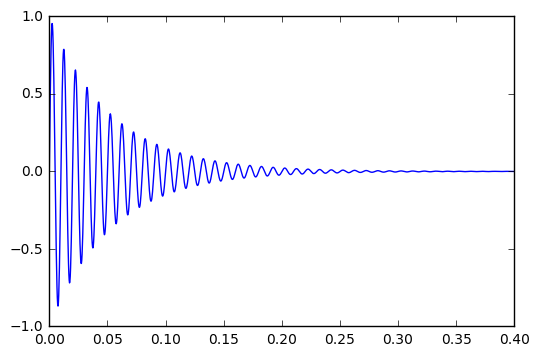

In [11]:
# Plot impulse response
plt.xlabel('$t$')
plt.ylabel('$y/(\omega_{n} N)$')
plt.plot(t, y);

We now use convolution to compute the response of the system under sinusoidal forcing at a range of frequencies, based on the impulse response.

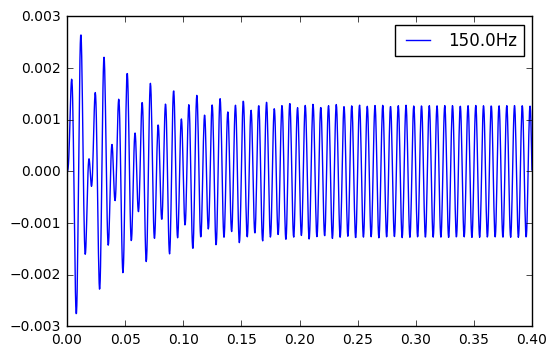

In [12]:
# Array of signal frequencies, converted to rad/s
frequencies = 2.0*np.pi*np.array([80.0, 100.0, 110.0, 150.0])

# For each frequency, compute signal, perform convolution and plot
# response

# Creates labels for plot
plt.xlabel('$t$')
plt.ylabel('$y/(\omega_{n} N)$')

for f in frequencies:

    # Compute forcing term
    forcing = np.sin(f*t)

    # Convolve
    conv = np.convolve(y, forcing)*dt

    # Plots
    plt.plot(t, conv[0:len(t)], label=str(f/(2.0*np.pi))+'Hz')

# Creates legend
plt.legend(loc='upper right');